In [346]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits

## xx201

In [347]:
df=pd.read_csv('./bootstrap_error/6050390201/best_fit_period_0.01bin_40.txt',sep='\t',header=None)
# df1=pd.read_csv('./bootstrap_error/6050390201/best_fit_period_100.1.txt',sep='\t')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       40 non-null     object 
 1   1       40 non-null     float64
 2   2       40 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1.1+ KB


In [348]:
# plt.figure(figsize=(12,6))
# plt.plot(df[1],'-o',label=f'gaussian= {df[1].mean()}$\pm${df[1].std()}')
# #plt.plot(df1['Best_Fit_Period'],'-o',label=r'uniform= 9.80596$\pm$0.00913')
# plt.grid()
# plt.title('Gaussian vs Uniform 100 iterations pre outbursst xx201')
# plt.ylabel('Period (sec)')
# plt.xlabel('Iteration No.')
# plt.legend()

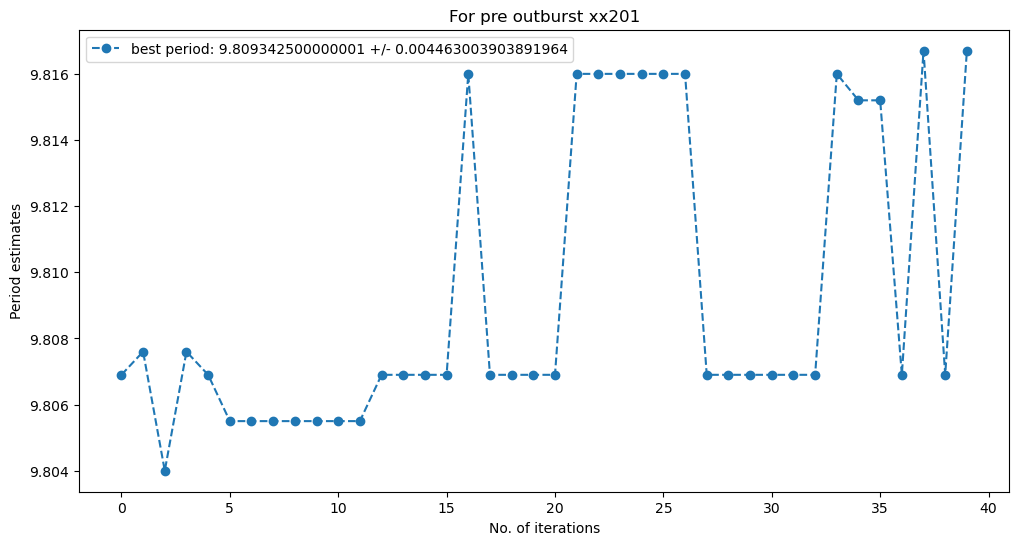

In [349]:
plt.figure(figsize=(12,6))
plt.plot(np.arange(len(df[1])),df[1],'--o',label=f'best period: {df[1].mean()} +/- {df[1].std()}')
plt.title('For pre outburst xx201')
plt.xlabel('No. of iterations')
plt.ylabel('Period estimates')
plt.legend()

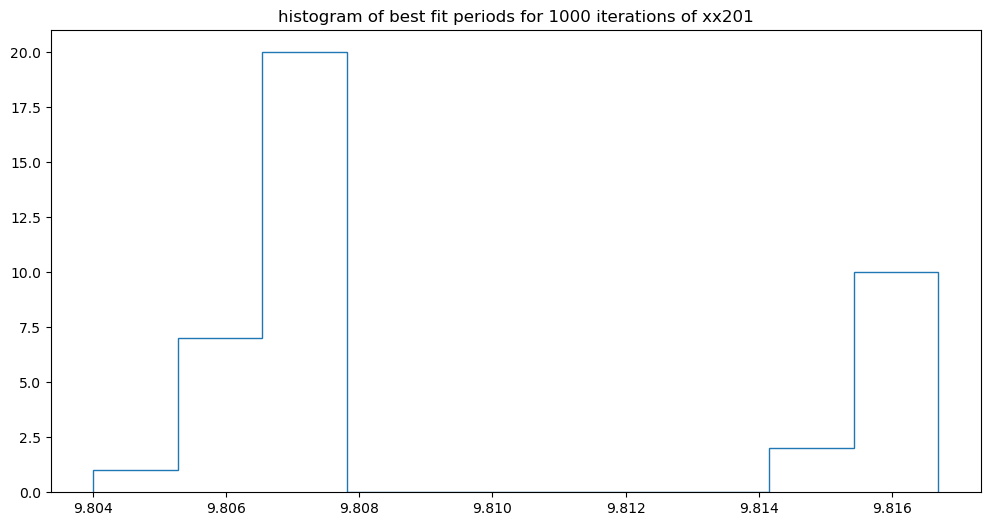

(array([ 1.,  7., 20.,  0.,  0.,  0.,  0.,  0.,  2., 10.]),
 array([9.804  , 9.80527, 9.80654, 9.80781, 9.80908, 9.81035, 9.81162,
        9.81289, 9.81416, 9.81543, 9.8167 ]))

In [353]:
plt.figure(figsize=(12,6))
freq =plt.hist(df[1],histtype='step')
plt.title('histogram of best fit periods for 1000 iterations of xx201')
plt.show()
freq[0],freq[1]

#plt.hist(df1['Best_Fit_Period'],histtype='step')

In [351]:
# ### Checking chisq vs period files

# with fits.open('testing_efsearch.fes') as hdul:
#     per=hdul['RESULTS'].data['PERIOD']
#     chisq=hdul['RESULTS'].data['CHISQRD1']

# plt.plot(per,chisq)
# plt.axvline(per[np.argmax(chisq)])
# print(per[np.argmax(chisq)],chisq[np.argmax(chisq)])

### Reading sample fits files

In [372]:
with fits.open('./6050390201/xti/event_cl/ni6050390201_cl_night_barycorrmpu7_sr_night_0.01.lc') as hdul:
        rate_data = hdul['RATE'].data
        time = rate_data['TIME']
        rate2 = rate_data['RATE']
        error2 = rate_data['ERROR']

with fits.open('./bootstrap_error/6050390201/synthetic_light_curve_20.fits') as hdul:
        rate_data = hdul['RATE'].data
        time20 = rate_data['TIME']
        rate20 = rate_data['RATE']
        error20 = rate_data['ERROR']

with fits.open('./bootstrap_error/6050390201/synthetic_light_curve_21.fits') as hdul:
        rate_data = hdul['RATE'].data
        time21 = rate_data['TIME']
        rate21 = rate_data['RATE']
        error21 = rate_data['ERROR']

with fits.open('./bootstrap_error/6050390201/synthetic_light_curve_22.fits') as hdul:
        rate_data = hdul['RATE'].data
        time22 = rate_data['TIME']
        rate22 = rate_data['RATE']
        error22 = rate_data['ERROR']    

In [370]:
### Generating a random light curve manually
gamma = np.random.uniform(-1, 1, size=len(rate2))
synthetic_rate=rate2+gamma*error2
synthetic_rate2 = np.zeros_like(rate2)  # Initialize array for synthetic rate
for j in range(len(rate2)):
    gamma_j = np.random.uniform(-1, 1)  # Generate a new random number for each bin
    synthetic_rate2[j] = rate2[j]+gamma_j*error2[j] 

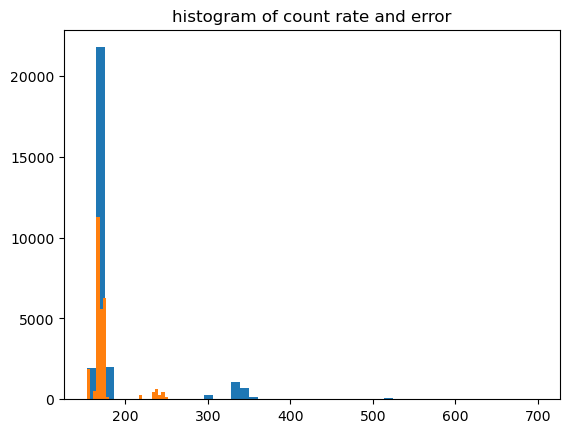

In [371]:
plt.hist(rate2[rate2>0],bins=50)
plt.hist(error2[rate2>0],bins=50)
plt.title('histogram of count rate and error')
plt.show()

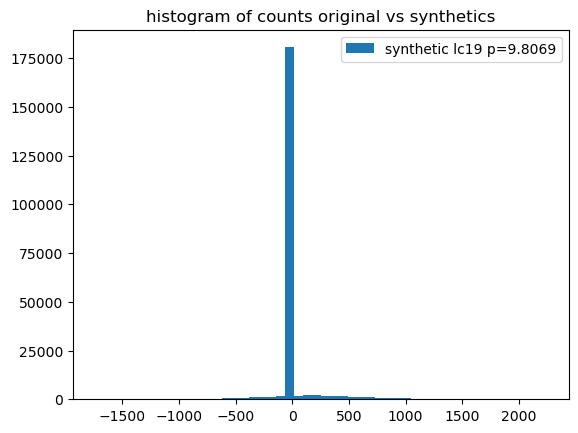

In [374]:
#plt.hist(rate2,bins=50, label='original lc p=9.816')
#plt.hist(rate20,bins=50,label='sythetic lc17 p=9.7972')
#plt.hist(rate21,bins=50,label='sythetic lc18 p=9.8069')
plt.hist(rate22,bins=50,label='synthetic lc19 p=9.8069')
#plt.hist(synthetic_rate,bins=50,label='generated now')
#plt.hist(synthetic_rate2,bins=50,label='generated now bin by bin')
plt.title('histogram of counts original vs synthetics')
plt.legend(loc='upper right')
plt.show()

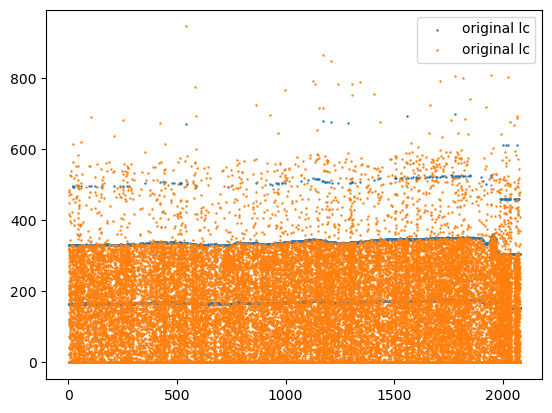

In [364]:
plt.scatter(time,rate2,0.5,label='original lc')
#plt.scatter(time,rate17,0.5,label='synthetic lc 17')
plt.scatter(time,synthetic_rate,0.5,label='original lc')
# plt.scatter(time,synthetic_rate2,0.5,label='original lc')
plt.legend(loc='upper right')

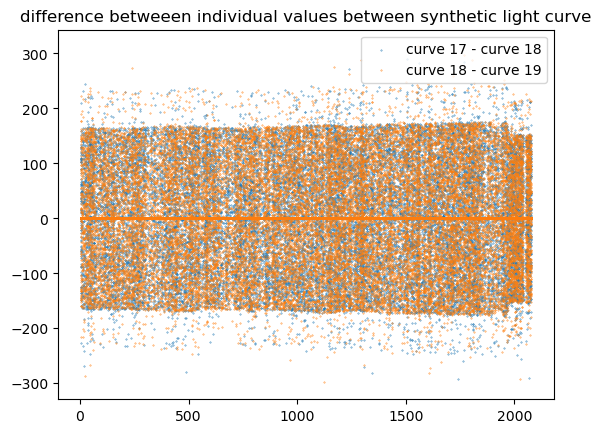

In [163]:
plt.scatter(time, rate17-rate18,0.1,label='curve 17 - curve 18')
plt.scatter(time, rate18-rate19,0.1,label='curve 18 - curve 19')
plt.title('difference betweeen individual values between synthetic light curve')
plt.legend(loc='upper right')

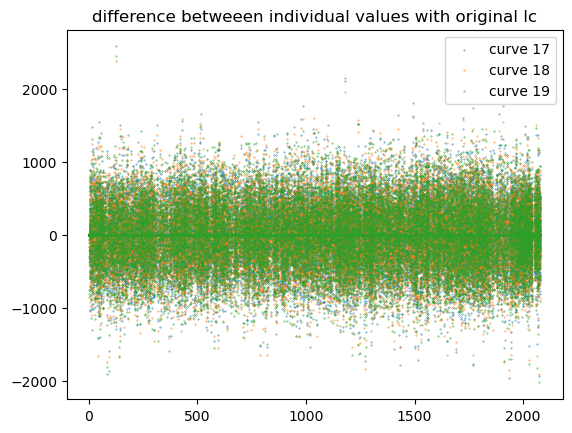

In [164]:
plt.scatter(time, rate2-rate17,0.1,label='curve 17')
plt.scatter(time, rate2-rate18,0.1,label='curve 18')
plt.scatter(time, rate2-rate19,0.1,label='curve 19')
plt.title('difference betweeen individual values with original lc')
plt.legend(loc='upper right')

In [165]:
from scipy.stats import pearsonr,spearmanr
## Check spearman coefficient
# Check correlation between each synthetic light curve and the one just before it
correlation_results = []
spearman_correlations = []


corr_coeff, _ = pearsonr(rate17, rate18)
spearman_corr, _ = spearmanr(rate17, rate18)
correlation_results.append(corr_coeff)
spearman_correlations.append(spearman_corr)
corr_coeff, _ = pearsonr(rate18, rate19)
spearman_corr, _ = spearmanr(rate18, rate19)
correlation_results.append(corr_coeff)
spearman_correlations.append(spearman_corr)
corr_coeff, _ = pearsonr(rate17, rate19)
spearman_corr, _ = spearmanr(rate17, rate19)
correlation_results.append(corr_coeff)
spearman_correlations.append(spearman_corr)
#print(f"Correlation between Curve {i} and Curve {i-1}: {corr_coeff:.4f}")
print('done')

done


In [166]:
spearman_correlations,correlation_results

([0.8645128311547158, 0.8688400408674869, 0.8177570816673555],
 [0.9759104180601018, 0.976845310011856, 0.9530517943722749])

In [210]:
best_fit=[]
efsearch17=fits.open('./bootstrap_error/6050390201/efsearch17.fes')
perios17=efsearch17[1].data['PERIOD']
chisq17=efsearch17[1].data['CHISQRD1']
best_fit.append(perios17[np.argmax(chisq17)])

efsearch18=fits.open('./bootstrap_error/6050390201/efsearch18.fes')
perios18=efsearch18[1].data['PERIOD']
chisq18=efsearch18[1].data['CHISQRD1']
best_fit.append(perios18[np.argmax(chisq18)])

efsearch19=fits.open('./bootstrap_error/6050390201/efsearch19.fes')
perios19=efsearch19[1].data['PERIOD']
chisq19=efsearch19[1].data['CHISQRD1']
best_fit.append(perios19[np.argmax(chisq19)])

efsearch20=fits.open('./bootstrap_error/6050390201/efsearch20.fes')
perios20=efsearch20[1].data['PERIOD']
chisq20=efsearch20[1].data['CHISQRD1']
best_fit.append(perios20[np.argmax(chisq20)])

[9.7972, 9.7972, 9.804200000000002, 9.804200000000002]


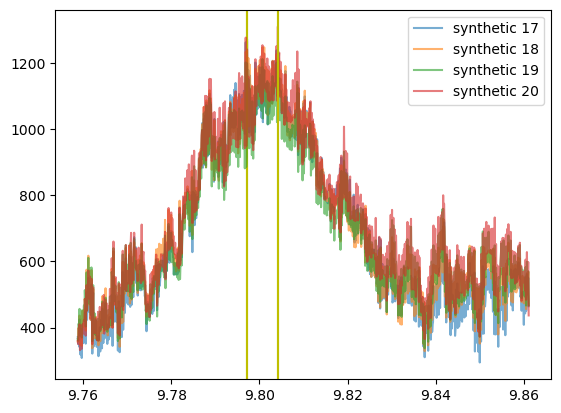

In [211]:
print(best_fit)
plt.plot(perios17,chisq17,label='synthetic 17',alpha=0.6)
plt.axvline(best_fit[0],c='y')
plt.plot(perios18,chisq18,label='synthetic 18',alpha=0.6)
plt.axvline(best_fit[1],c='y')
plt.plot(perios19,chisq19,label='synthetic 19',alpha=0.6)
plt.axvline(best_fit[2],c='y')
plt.plot(perios20,chisq20,label='synthetic 20',alpha=0.6)
plt.axvline(best_fit[3],c='y')
plt.legend(loc='upper right')

## xx204

In [342]:
df=pd.read_csv('./bootstrap_error/6050390204/best_fit_period_0.01bin_40.txt',sep='\t',header=None)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       40 non-null     object 
 1   1       40 non-null     float64
 2   2       40 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1.1+ KB


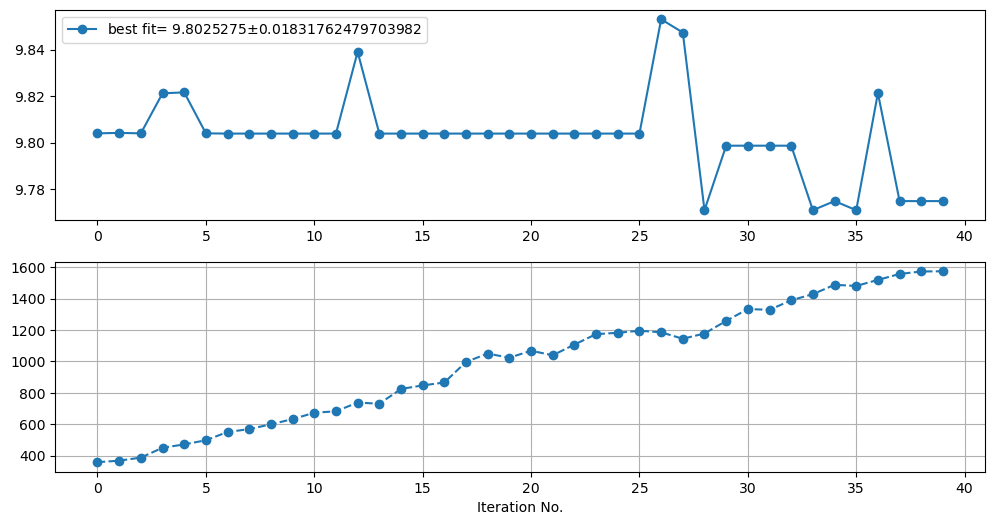

In [343]:
fig,axs=plt.subplots(2,1,figsize=(12,6))
axs[0].plot(df[1],'-o',label=f'best fit= {df[1].mean()}$\pm${df[1].std()}')
axs[1].plot(df[2],'--o')
#plt.plot(df3['Best_Fit_Period'],'-o',label=r'uniform= 9.80575$\pm$0.00780')
plt.xlabel('Iteration No.')
axs[0].legend()
plt.grid()

(array([ 7.,  0.,  0.,  4., 23.,  0.,  3.,  0.,  1.,  2.]),
 array([9.771 , 9.7792, 9.7874, 9.7956, 9.8038, 9.812 , 9.8202, 9.8284,
        9.8366, 9.8448, 9.853 ]),
 <BarContainer object of 10 artists>)

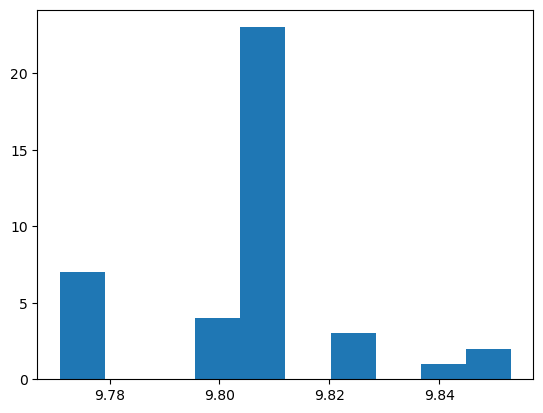

In [344]:
plt.hist(df[1])

In [345]:
## Reading and plotting og lc
with fits.open('./6050390204/xti/event_cl/ni6050390204_cl_night_barycorrmpu7_sr_night_0.01.lc') as hdul:
        rate_data = hdul['RATE'].data
        time = rate_data['TIME']
        rate2 = rate_data['RATE']
        error2 = rate_data['ERROR']

plt.hist(rate2,bins=50)
plt.hist(error2,bins=50)
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: './6050390204/xti/event_cl/ni6050390204_cl_night_barycorrmpu7_sr_night_0.01.lc'

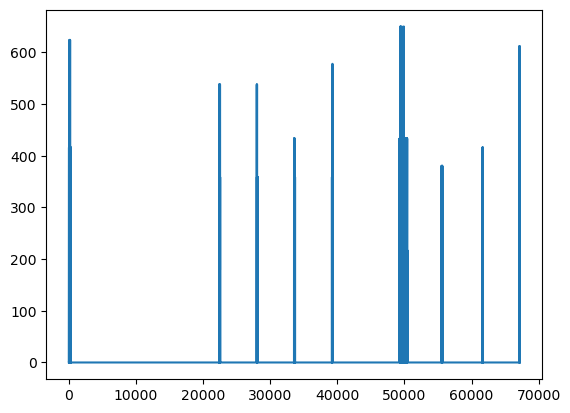

In [317]:
plt.plot(time,rate2)

## xx227

In [252]:
df=pd.read_csv('./bootstrap_error/6050390227/best_fit_period_0.01bin_40.txt',sep='\t',header=None)
# df1=pd.read_csv('./bootstrap_error/6050390201/best_fit_period_100.1.txt',sep='\t')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       40 non-null     object 
 1   1       40 non-null     float64
 2   2       40 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1.1+ KB


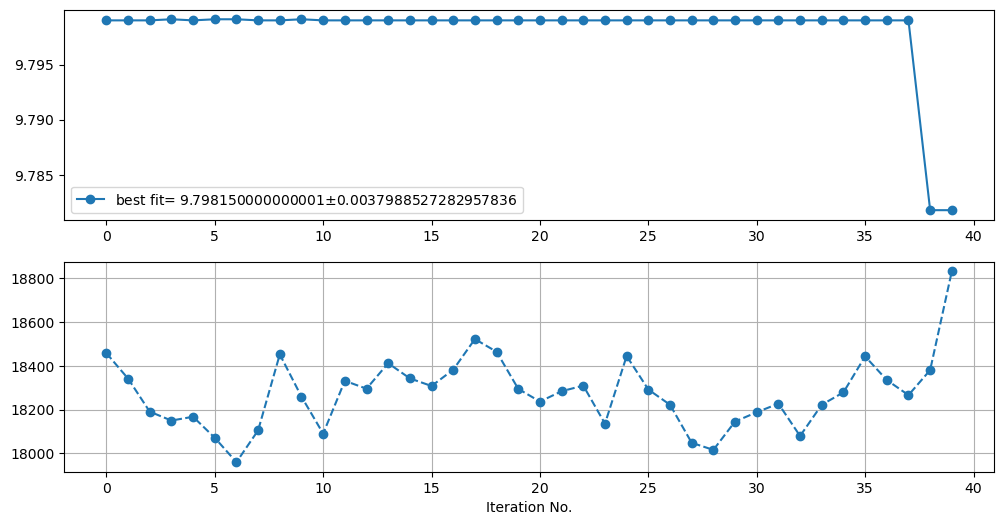

In [253]:
fig,axs=plt.subplots(2,1,figsize=(12,6))
axs[0].plot(df[1],'-o',label=f'best fit= {df[1].mean()}$\pm${df[1].std()}')
axs[1].plot(df[2],'--o')
#plt.plot(df3['Best_Fit_Period'],'-o',label=r'uniform= 9.80575$\pm$0.00780')
plt.xlabel('Iteration No.')
axs[0].legend()
plt.grid()

9.799000000000001 18443.55


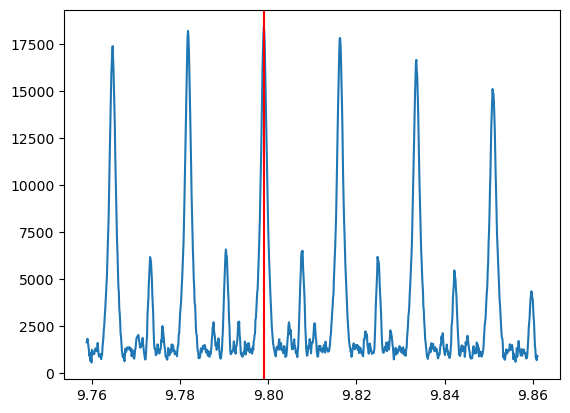

In [251]:
### Checking chisq vs period files

with fits.open('./bootstrap_error/6050390227/testing_efsearch.fes') as hdul:
    per=hdul['RESULTS'].data['PERIOD']
    chisq=hdul['RESULTS'].data['CHISQRD1']

plt.plot(per,chisq)
plt.axvline(per[np.argmax(chisq)],c='r')
print(per[np.argmax(chisq)],chisq[np.argmax(chisq)])

## Mid Burst xx244

In [262]:
df2=pd.read_csv('./bootstrap_error/6050390244/best_fit_period_0.01bin_40.txt',sep='\t',header=None)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       40 non-null     object 
 1   1       40 non-null     float64
 2   2       40 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1.1+ KB


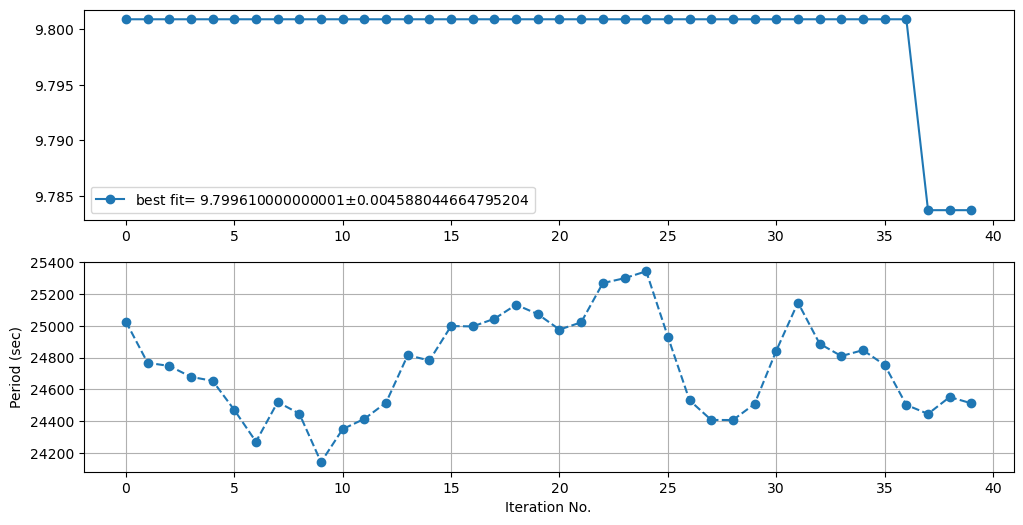

In [272]:

fig,axs=plt.subplots(2,1,figsize=(12,6))
axs[0].plot(df2[1],'-o',label=f'best fit= {df2[1].mean()}$\pm${df2[1].std()}')
axs[1].plot(df2[2],'--o')
#plt.plot(df3['Best_Fit_Period'],'-o',label=r'uniform= 9.80575$\pm$0.00780')

plt.ylabel('Period (sec)')
plt.xlabel('Iteration No.')
axs[0].legend()
plt.grid()

9.79918

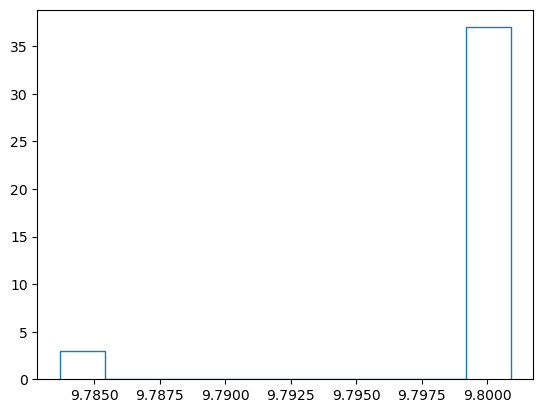

In [265]:
freq=plt.hist(df2[1],histtype='step',bins=10)
freq[1][np.argmax(freq[0])]

9.783700000000001 24512.121


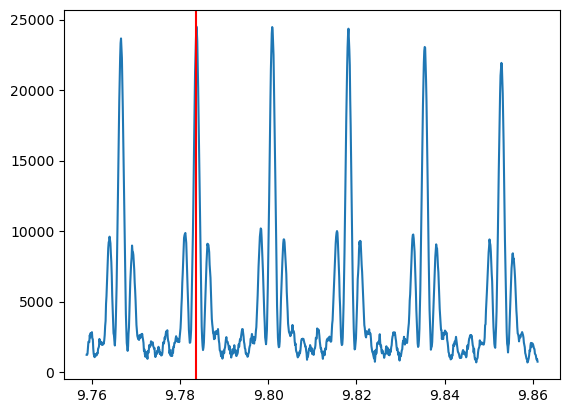

In [260]:
### Checking chisq vs period files

with fits.open('./bootstrap_error/6050390244/testing_efsearch.fes') as hdul:
    per=hdul['RESULTS'].data['PERIOD']
    chisq=hdul['RESULTS'].data['CHISQRD1']

plt.plot(per,chisq)
plt.axvline(per[np.argmax(chisq)],c='r')
print(per[np.argmax(chisq)],chisq[np.argmax(chisq)])

## xx261

In [261]:
df4=pd.read_csv('./bootstrap_error/6050390261/best_fit_period_0.01bin_40.txt',sep='\t',header=None)
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       40 non-null     object 
 1   1       40 non-null     float64
 2   2       40 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1.1+ KB


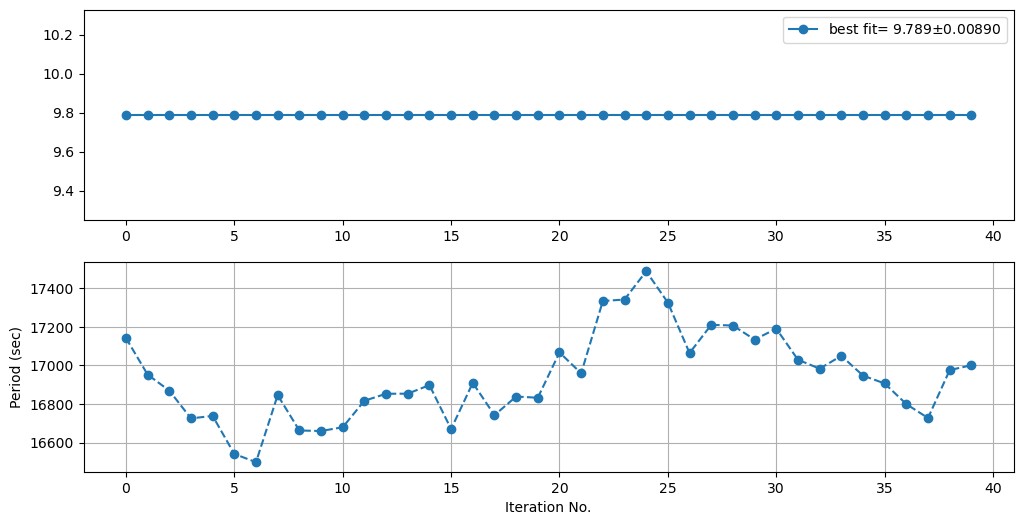

In [242]:
fig,axs=plt.subplots(2,1,figsize=(12,6))
axs[0].plot(df4[1],'-o',label=f'best fit= {df4[1].mean()}$\pm$0.00890')
axs[1].plot(df4[2],'--o')
#plt.plot(df3['Best_Fit_Period'],'-o',label=r'uniform= 9.80575$\pm$0.00780')

plt.ylabel('Period (sec)')
plt.xlabel('Iteration No.')
axs[0].legend()
plt.grid()

9.789000000000001 17001.162


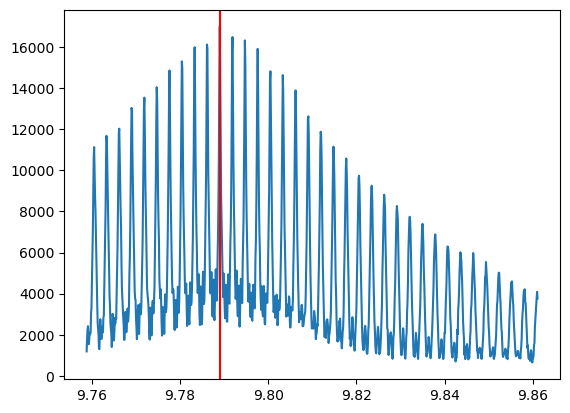

In [244]:
### Checking chisq vs period files

with fits.open('./bootstrap_error/6050390261/testing_efsearch.fes') as hdul:
    per=hdul['RESULTS'].data['PERIOD']
    chisq=hdul['RESULTS'].data['CHISQRD1']

plt.plot(per,chisq)
plt.axvline(per[np.argmax(chisq)],c='r')
print(per[np.argmax(chisq)],chisq[np.argmax(chisq)])

## xx284

In [267]:
df6=pd.read_csv('./bootstrap_error/6050390284/best_fit_period_0.01bin_40.txt',sep='\t',header=None)
df6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       24 non-null     object 
 1   1       24 non-null     float64
 2   2       24 non-null     float64
dtypes: float64(2), object(1)
memory usage: 708.0+ bytes


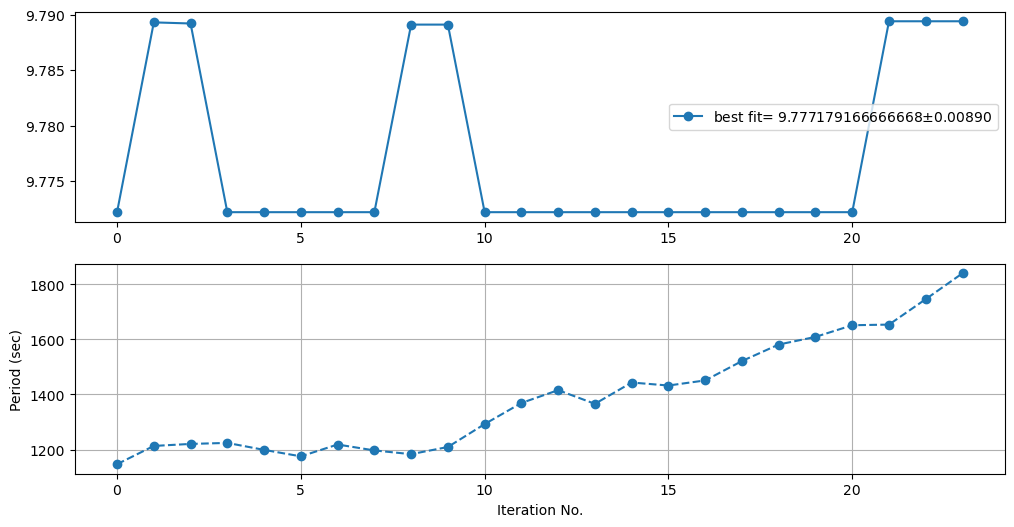

In [269]:
fig,axs=plt.subplots(2,1,figsize=(12,6))
axs[0].plot(df6[1],'-o',label=f'best fit= {df6[1].mean()}$\pm$0.00890')
axs[1].plot(df6[2],'--o')
#plt.plot(df3['Best_Fit_Period'],'-o',label=r'uniform= 9.80575$\pm$0.00780')

plt.ylabel('Period (sec)')
plt.xlabel('Iteration No.')
axs[0].legend()
plt.grid()

9.7894 1942.8759


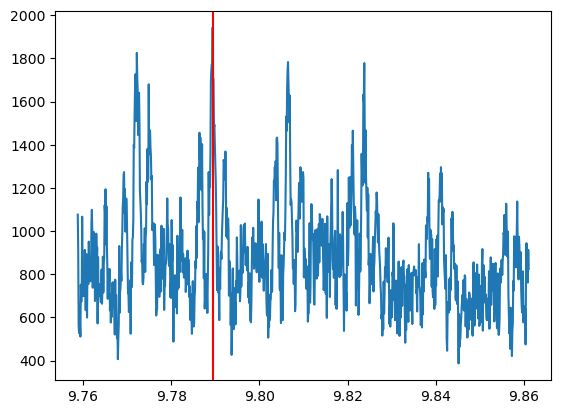

In [270]:
### Checking chisq vs period files

with fits.open('./bootstrap_error/6050390284/testing_efsearch.fes') as hdul:
    per=hdul['RESULTS'].data['PERIOD']
    chisq=hdul['RESULTS'].data['CHISQRD1']

plt.plot(per,chisq)
plt.axvline(per[np.argmax(chisq)],c='r')
print(per[np.argmax(chisq)],chisq[np.argmax(chisq)])

# Using random of fcalc

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [17]:
df201=pd.read_csv('./bootstrap_error/6050390201/periods.dat',header=None,sep=' ')
df204=pd.read_csv('./bootstrap_error/6050390204/periods.dat',header=None,sep=' ')
df201.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       1000 non-null   float64
 1   1       1000 non-null   float64
dtypes: float64(2)
memory usage: 15.8 KB


In [23]:
9.80-(1e-5*2048)

9.779520000000002

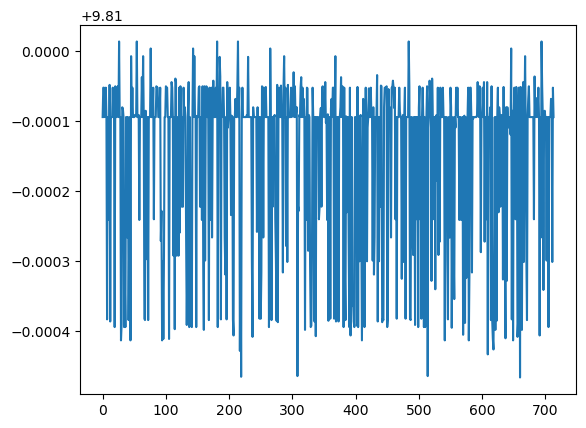

In [19]:
plt.plot(np.arange(0,714),df204[0])